# 심부전 임상 기록 데이터셋을 분석해보자!
#### 사용한 데이터셋 : https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [1]:
# 사용할 라이브러리 import 해오기
import numpy as np                  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns;


Bad key savefig.frameon in file /home/bang/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/bang/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/bang/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an update

## 파일 읽어오기
|특징|설명|
|:---|:---|
|age|심정지가 일어난 사람의 연령|
|anaemia|적혈구 또는 헤모글로빈의 감소 여부. 0이면 없음, 1이면 있음|
|creatinine_phosphokinase|혈액 내 CPK 효소 수치(mcg/L)|
|diabetes|당뇨 여부. 0이면 없음, 1이면 있음|
|ejection_fraction|심장 수축시 혈액 방출 정도|
|high_blood_pressure|고혈압 여부 0이면 없음 1이면 있음|
|platelets|혈액 내 혈소판(kiloplatelets/mL)|
|serum_creatinine|혈액 내 creatinine(mg/dL)|
|serum_sodium|혈액 내 나트륨 농도(mEq/L)|
|sex|0이면 여성, 1이면 남성|
|smoking|0이면 비흡연자 1이면 흡연자|
|time|심정지 발생 후 후속 기간(일)|
|DEATH_EVENT|후속 기간동안 사망하지 않았으면 0, 아니면 1|

In [2]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 데이터 분석하기

### info()와 describe()를 통해, 비어있는 정보와 각 제이터들의 분산을 확인하자!

In [3]:
df.info()   # null 값은 보이지 않는다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()   # 수치로 볼 때는 platelets(혈액 내 혈소판 비율)이 가장 크다.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### continuous feature, discrete feature를 각각 시각화해보자!

In [5]:
palette = sns.color_palette('coolwarm', 8)  # 사용할 palette 지정.

# continuous, discrete feature들 나누기
continuous_index = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
discrete_index = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

#### continuous feature를 각각 시각화해보자

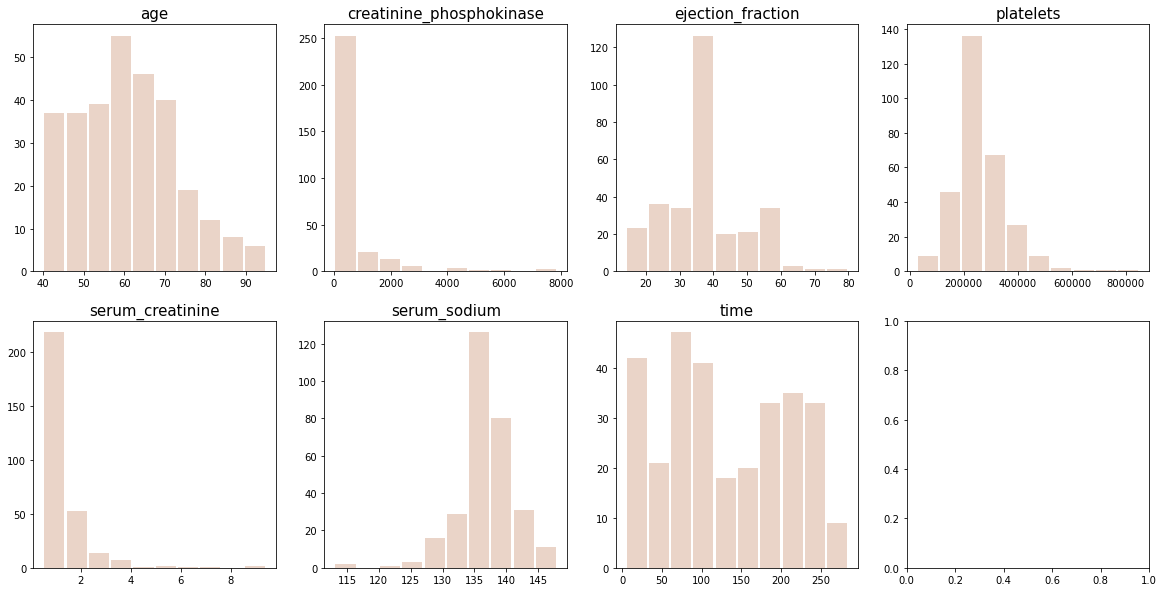

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for index, col_name in enumerate(continuous_index):
    axes[index//4, index%4].set_title(col_name, size=15)
    axes[index//4, index%4].hist(df[col_name], rwidth=0.9, color=palette[4])
    
plt.show()

#### discrete feature를 각각 시각화해보자

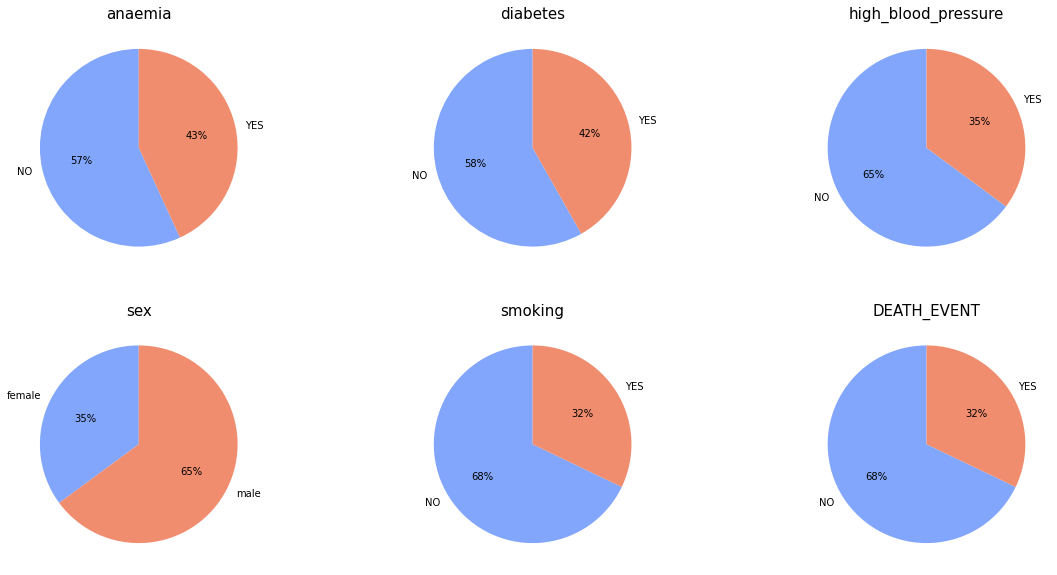

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
for index, col_name in enumerate(discrete_index):
    axes[index//3, index%3].set_title(col_name, size=15)
    if col_name == 'sex':
        axes[index//3, index%3].pie( [len(df[df[col_name]<0.5]), len(df[df[col_name]>0.5])], labels=['female', 'male'], colors=[palette[1], palette[6]], autopct='%.f%%', startangle=90)
    else:
        axes[index//3, index%3].pie( [len(df[df[col_name]<0.5]), len(df[df[col_name]>0.5])], labels=['NO', 'YES'], colors=[palette[1], palette[6]], autopct='%.f%%', startangle=90)
    
plt.show()

### 각 Feature들 사이의 correlation을 확인하자

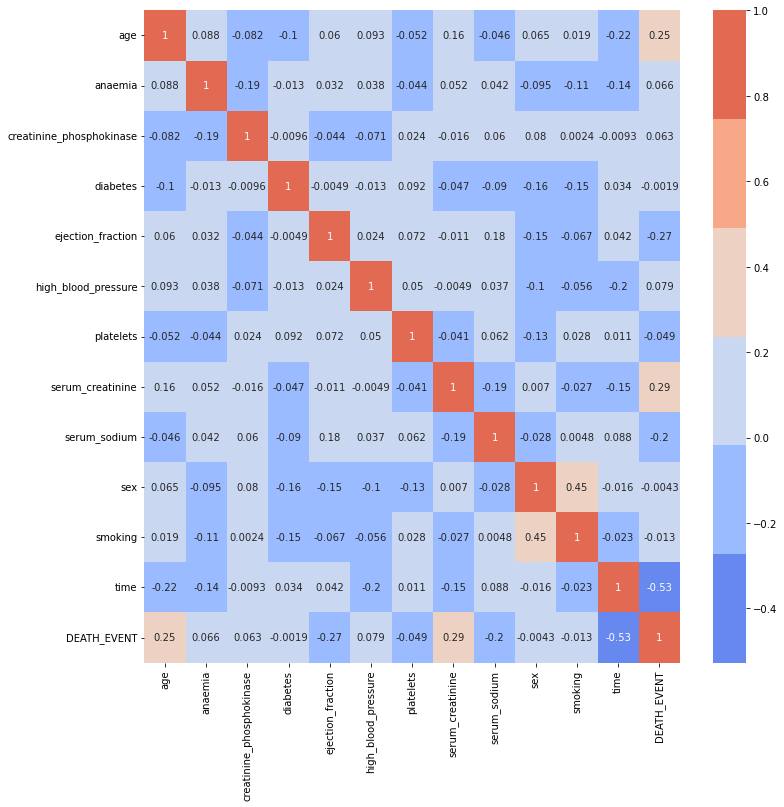

In [8]:
corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap=sns.color_palette('coolwarm'))
plt.show()

### DEATH_EVENT와 correlation이 큰 feature들을 시각화해보자

#### Time : 후속기간이 길어질수록 사망비율이 줄어드는 것을 볼 수 있다.

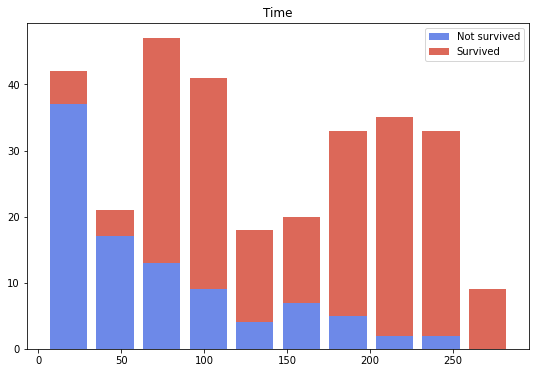

In [9]:
death_event_df = df[df['DEATH_EVENT']==1]       
non_death_event_df = df[df['DEATH_EVENT']==0]

plt.figure(figsize=(9,6))
plt.title('Time')
plt.hist((death_event_df['time'], non_death_event_df['time']), label = ('Not survived', 'Survived'),
         color=[palette[0], palette[-1]], alpha=0.9, rwidth=0.8, histtype='barstacked')
plt.legend()
plt.show()

#### Serum_creatinine : 심정지로 인해 사망한 그룹에서 creatinine의 분포가 더 넓게 퍼져있다.

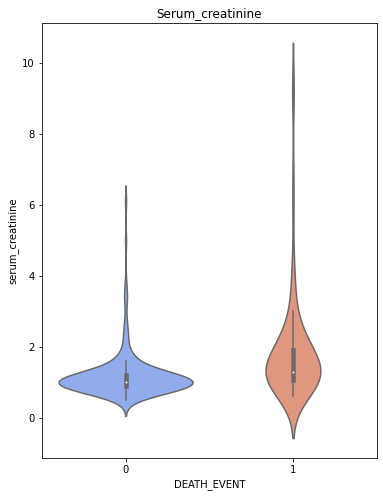

In [10]:
plt.figure(figsize=(6,8))
plt.title('Serum_creatinine')
sns.violinplot(x='DEATH_EVENT', y='serum_creatinine', data = df, palette=[palette[1], palette[6]])
plt.show()

#### Serum_sodium : 심정지로 인해서 사망한 그룹에서 sodium의 평균이 조금 더 낮고 분포가 넓다.

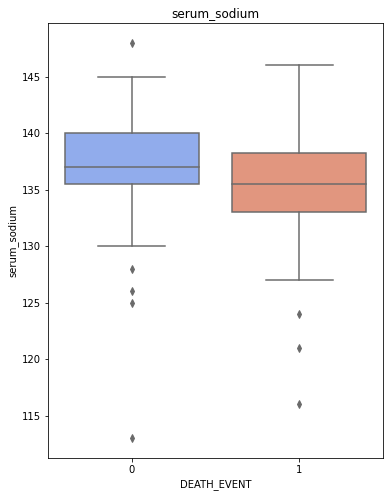

In [11]:
plt.figure(figsize=(6,8))
plt.title('serum_sodium')
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data = df, palette=[palette[1], palette[6]])
plt.show()

#### 연령대별 death_event 빈도
1. 심정지 연령은 40대부터 시작하고 60대에 심정지로 인한 사망이 많이 발생하는 것으로 확인된다
2. 비율이 아닌 수치로만 본다면, 심정지가 발생하면 많은 사망이 발생한 연령대는 60대이다
3. 그러나 연령별 사망비율을 본다면, 나이가 많을 수록 심정지가 일어났을 때 사망하는 비율이 높았다.

In [12]:
age_count = [0 for _ in range(6)]
age_death_event = [0 for _ in range(6)]

# 연령대를 나누는 작업
for index, row in df.iterrows():
    age_count[int(row['age']//10) - 4] += 1
    if row['DEATH_EVENT'] ==  1:
        age_death_event[int(row['age']//10) - 4] += 1

# 연령별 사망비율 계산
death_percentage = []
for i in range(6):
    death_percentage.append((age_death_event[i]/age_count[i])*100)

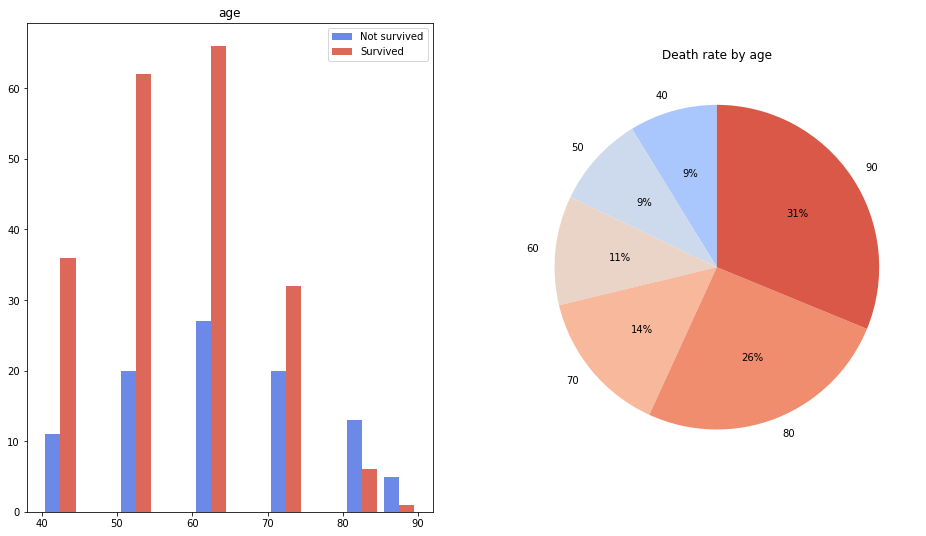

In [13]:
death_event_df = df[df['DEATH_EVENT']==1]
non_death_event_df = df[df['DEATH_EVENT']==0]

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
ax = axes.flatten()

ax[0].set_title('age')
ax[0].hist((death_event_df['age']//10*10, non_death_event_df['age']//10*10),
         label = ('Not survived', 'Survived'), color=[palette[0], palette[-1]], alpha=0.9)
ax[0].legend()

ax[1].set_title('Death rate by age')
ax[1].pie(death_percentage, labels=list(range(40, 100, 10)), colors=palette[2:], autopct='%.f%%', startangle=90)
plt.show()

#### ejection_fraction : DEATH_EVENT가 나타난 그룹의 경우 혈액방출의 정도가 비교적 적었다.

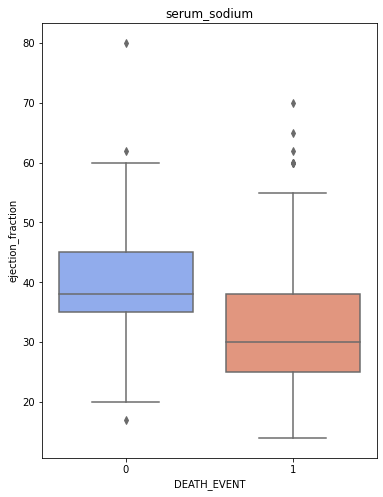

In [14]:
plt.figure(figsize=(6,8))
plt.title('serum_sodium')
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data = df, palette=[palette[1], palette[6]])
plt.show()

# 모델 구축 및 학습
#### DEATH_EVENT를 label로 사용하여, 어떤 환자가 심정지가 일어났을 때 DEATH_EVENT가 발생할 수 있는지 확인하자.

### continuous feature를 **정규화하지 않고** 모델을 학습시켜보자

In [15]:
# 사용하는 라이브러리 import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

In [16]:
# x_feature
x_feature = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

# train, test data 나누기
X_train, X_test, y_train, y_test = train_test_split(df[x_feature], df['DEATH_EVENT'], test_size=0.20, random_state=0)

In [17]:
# 모델 생성 및 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 학습된 모델 예측
prediction = model.predict(X_test)

In [18]:
print(classification_report(y_test, prediction)) # 정확도가 0.83정도가 나오는 것을 볼 수 있다.

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        37
           1       0.88      0.65      0.75        23

    accuracy                           0.83        60
   macro avg       0.85      0.80      0.81        60
weighted avg       0.84      0.83      0.83        60



### continuous feature를 **정규화하고** 모델을 학습시켜보자

In [19]:
# z-score normalization
def norm(x):
     return x - x.mean() / x.std()

In [20]:
# continous_index에 정규화 적용
norm_df = df
norm_df[continuous_index] = norm(df[continuous_index])
norm_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,69.885677,0,581.400343,0,16.782077,1,264997.307294,0.552619,99.036573,1,0,2.321688,1
1,49.885677,0,7860.400343,0,34.782077,0,263355.337294,-0.247381,105.036573,1,0,4.321688,1
2,59.885677,0,145.400343,0,16.782077,0,161997.307294,-0.047381,98.036573,1,1,5.321688,1
3,44.885677,1,110.400343,0,16.782077,0,209997.307294,0.552619,106.036573,1,0,5.321688,1
4,59.885677,1,159.400343,1,16.782077,0,326997.307294,1.352619,85.036573,0,0,6.321688,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,56.885677,0,60.400343,1,34.782077,1,154997.307294,-0.247381,112.036573,1,1,268.321688,0
295,49.885677,0,1819.400343,0,34.782077,0,269997.307294,-0.147381,108.036573,0,0,269.321688,0
296,39.885677,0,2059.400343,1,56.782077,0,741997.307294,-0.547381,107.036573,0,0,276.321688,0
297,39.885677,0,2412.400343,0,34.782077,0,139997.307294,0.052619,109.036573,1,1,278.321688,0


In [21]:
# train, test 데이터 분리
X_train2, X_test2, y_train2, y_test2 = train_test_split(norm_df[x_feature], norm_df['DEATH_EVENT'], test_size=0.20, random_state=0)

In [22]:
# 모델 생성 및 학습
model2 = RandomForestClassifier()
model2.fit(X_train2, y_train2)

# 모델의 예측값
prediction2 = model2.predict(X_test2)

In [23]:
print(classification_report(y_test2, prediction2)) # 정규화 하고난 후 정확도가 0.85로 0.02 증가한 것을 볼 수 있다.

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        37
           1       0.94      0.65      0.77        23

    accuracy                           0.85        60
   macro avg       0.88      0.81      0.83        60
weighted avg       0.86      0.85      0.84        60

